# 2.ARIMA AND SARIMA (TIME SERIES ANALYSIS

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%matplotlib inline

In [405]:
df=pd.read_csv("ibm-common-stock-closing-prices.csv")
df.head()

,Date,IBM common stock closing prices
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


In [332]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [334]:
df.dropna(inplace =True)

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 0 to 1007
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             1008 non-null   datetime64[ns]
 1   IBM common stock closing prices  1008 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.6 KB


In [342]:
df.rename(columns={'Date': 'Year', 'IBM common stock closing prices': 'Stock_price'}, inplace=True)

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 0 to 1007
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         1008 non-null   datetime64[ns]
 1   Stock_price  1008 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.6 KB


In [296]:
# df.drop(106,axis=0,inplace=True)

In [346]:
df.set_index("Year",inplace=True)

In [348]:
df.head()

,Stock_price
Year,
1962-01-02,572.00
1962-01-03,577.00
1962-01-04,571.25
1962-01-05,560.00
1962-01-08,549.50


## visualize the data

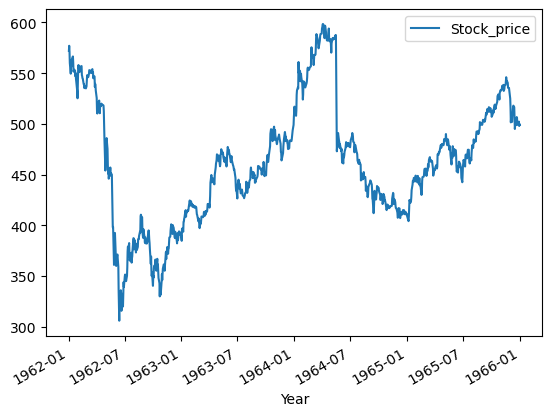

In [350]:
%matplotlib inline
df.plot()
plt.show()

In [268]:
test_results=adfuller(df['Stock_price'])
test_results

(-2.1718874320881807,
 0.2166064209350787,
 0,
 1007,
 {'1%': -3.436860474327014,
  '5%': -2.8644144230916537,
  '10%': -2.568300476140699},
 6533.2814803891915)

In [270]:
## testing for stationory
from statsmodels.tsa.stattools import adfuller

In [272]:
# ho it is non stationary
#h1 it is stationary
def adfuller_test(Stock_price):
    result=adfuller(Stock_price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [274]:
adfuller_test(df['Stock_price'])

ADF Test Statistic : -2.1718874320881807
p-value : 0.2166064209350787
#Lags Used : 0
Number of Observations Used : 1007
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [276]:
df['stock First Difference'] = df['Stock_price'] - df['Stock_price'].shift(1)
df['Stock_price'].shift(1)

Year
1962-01-02       NaN
1962-01-03    572.00
1962-01-04    577.00
1962-01-05    571.25
1962-01-08    560.00
               ...  
1965-12-27    499.00
1965-12-28    500.00
1965-12-29    502.25
1965-12-30    498.00
1965-12-31    500.00
Name: Stock_price, Length: 1008, dtype: float64

In [392]:
df['Stock First Difference'] = df['Stock_price'] - df['Stock_price'].shift(12)
df.head(14)

,Stock_price,forecast,Stock First Difference
Year,,,
1962-01-02,572.00,NaN,NaN
1962-01-03,577.00,NaN,NaN
1962-01-04,571.25,NaN,NaN
1962-01-05,560.00,NaN,NaN
1962-01-08,549.50,NaN,NaN
1962-01-09,556.00,NaN,NaN
1962-01-10,557.00,NaN,NaN
1962-01-11,563.00,NaN,NaN
1962-01-12,564.00,NaN,NaN


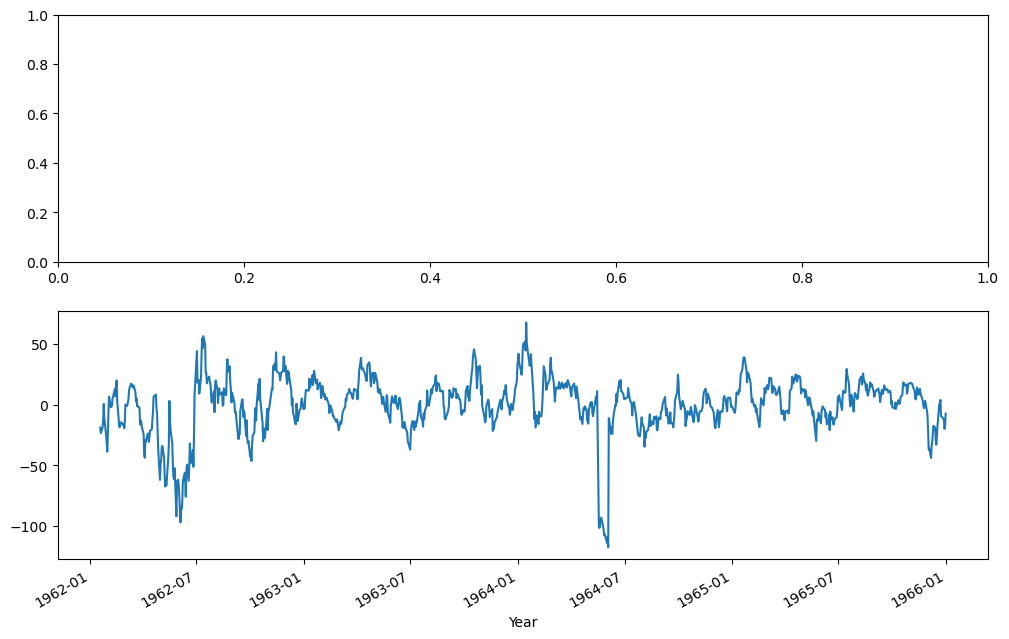

In [394]:
df['Stock First Difference'].plot()
plt.show()

# ARIMA MODEL

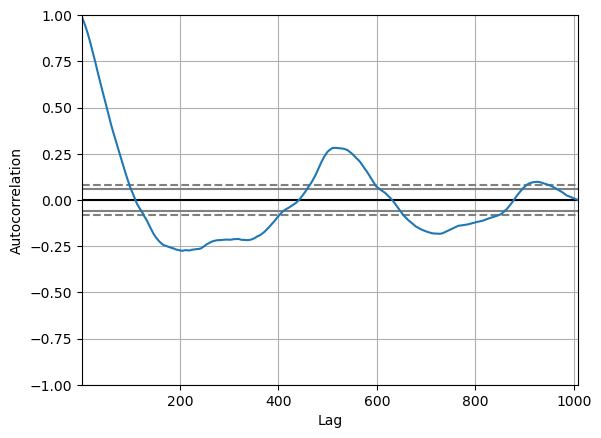

In [396]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Stock_price'])
plt.show()

### (Final Thoughts on Autocorrelation and Partial Autocorrelation
Identification of an AR model is often best done with the PACF.

For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
p,d,q p AR model lags d differencing q MA lag

In [368]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

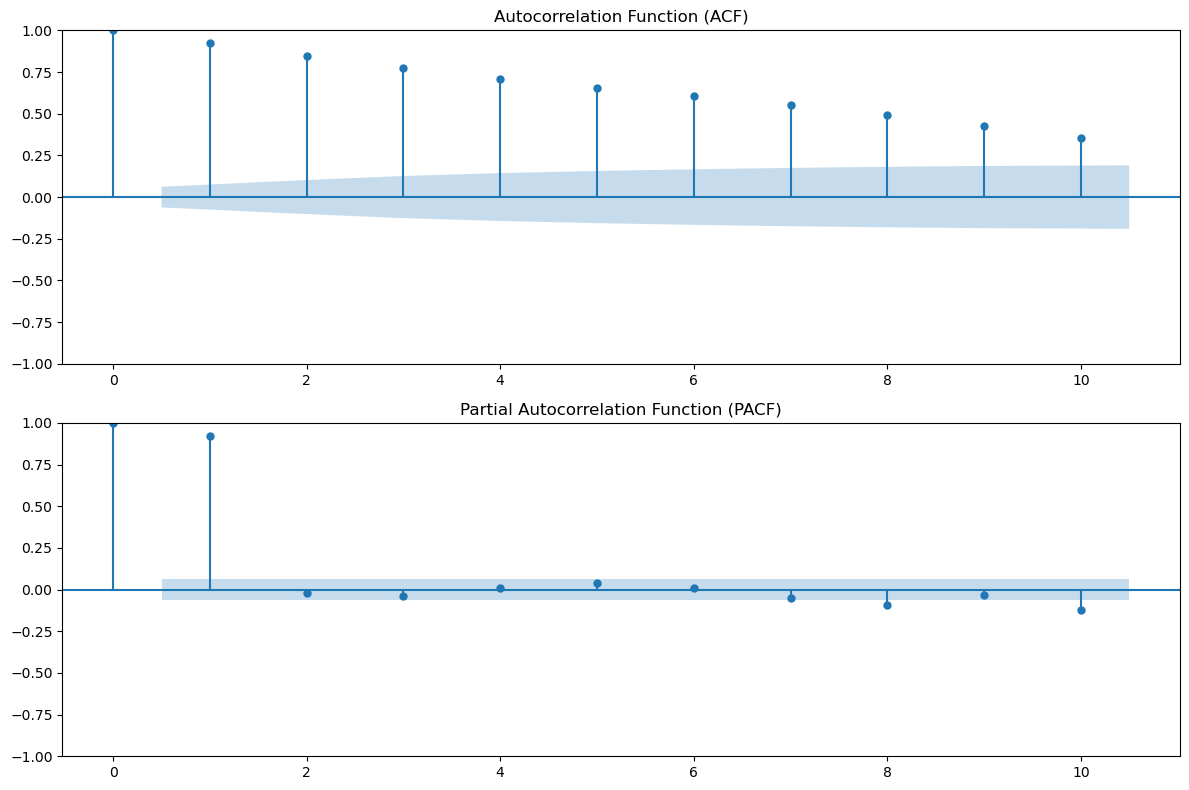

In [398]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

# Plot ACF
sm.graphics.tsa.plot_acf(df['Stock First Difference'].iloc[13:], lags=10, ax=ax1)
ax1.set_title("Autocorrelation Function (ACF)")

# Plot PACF
sm.graphics.tsa.plot_pacf(df['Stock First Difference'].iloc[13:], lags=10, ax=ax2, method='ywm')
ax2.set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [372]:
 #For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [374]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Stock_price'], order=(1,1,1))
model_fit = model.fit()


In [376]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Stock_price   No. Observations:                 1008
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3341.673
Date:                Sun, 21 Sep 2025   AIC                           6689.346
Time:                        12:29:11   BIC                           6704.090
Sample:                             0   HQIC                          6694.948
                               - 1008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0029      3.519      0.001      0.999      -6.894       6.899
ma.L1          0.0049      3.522      0.001      0.999      -6.898       6.908
sigma2        44.6587      0.314    142.225      0.000      44.043      45.274
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            316446.62
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -5.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        89.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [378]:
# Forecast next 5 steps
forecast = model_fit.forecast(steps=5)
print(forecast)

1008    498.992142
1009    498.992119
1010    498.992119
1011    498.992119
1012    498.992119
Name: predicted_mean, dtype: float64


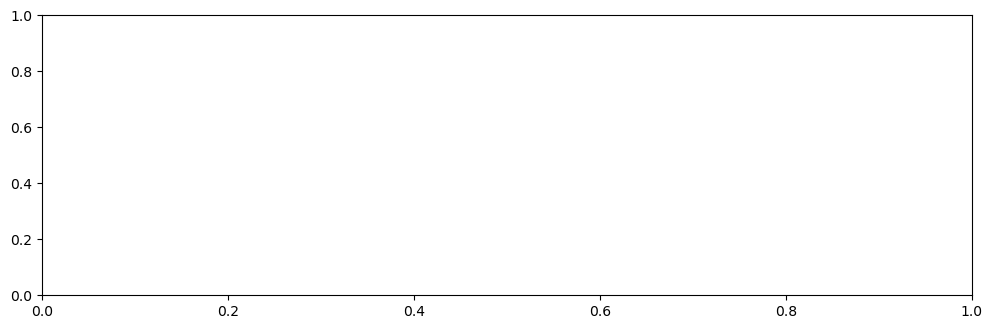

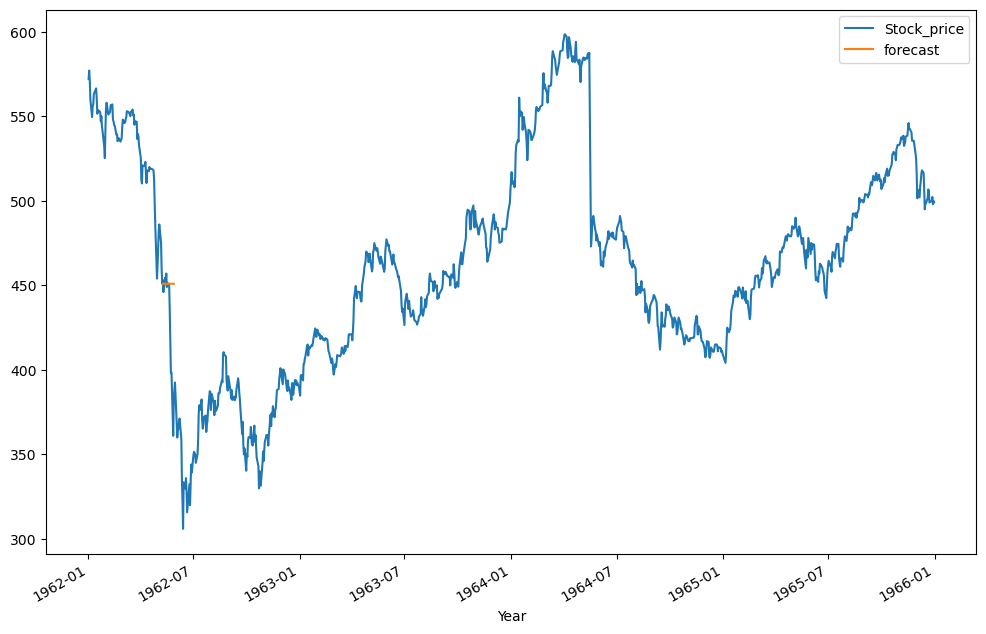

In [380]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Stock_price','forecast']].plot(figsize=(12,8))
plt.show()

In [168]:
import statsmodels.api as sm

In [170]:
model=sm.tsa.statespace.SARIMAX(df['Stock_price'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

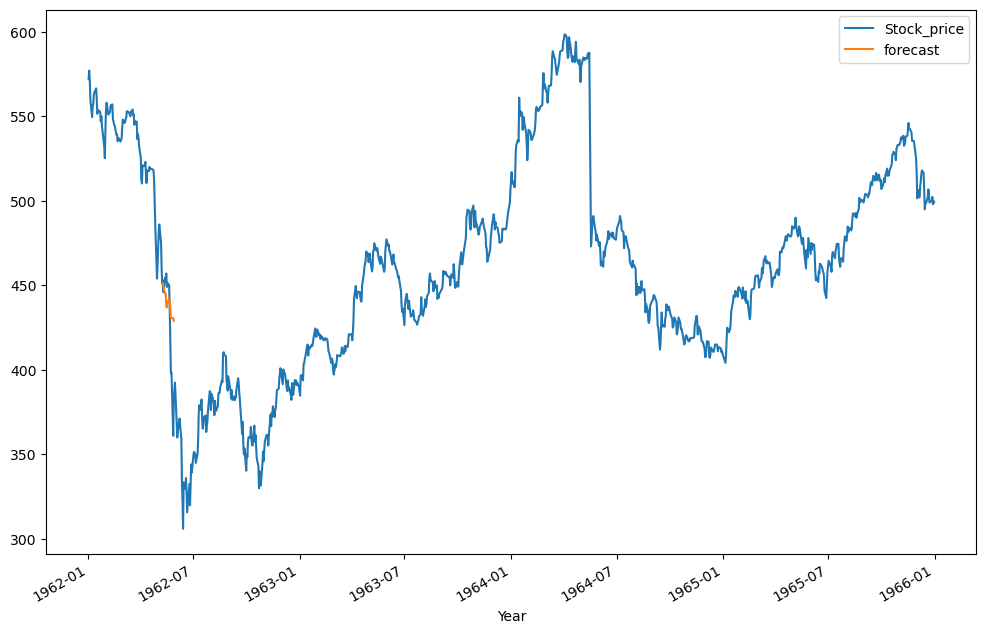

In [354]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Stock_price','forecast']].plot(figsize=(12,8))
plt.show()

In [178]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [180]:

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()

,Stock_price,stock First Difference,forecast
1967-07-31,NaN,NaN,NaN
1967-08-31,NaN,NaN,NaN
1967-09-30,NaN,NaN,NaN
1967-10-31,NaN,NaN,NaN
1967-11-30,NaN,NaN,NaN


In [182]:
future_df=pd.concat([df,future_datest_df])

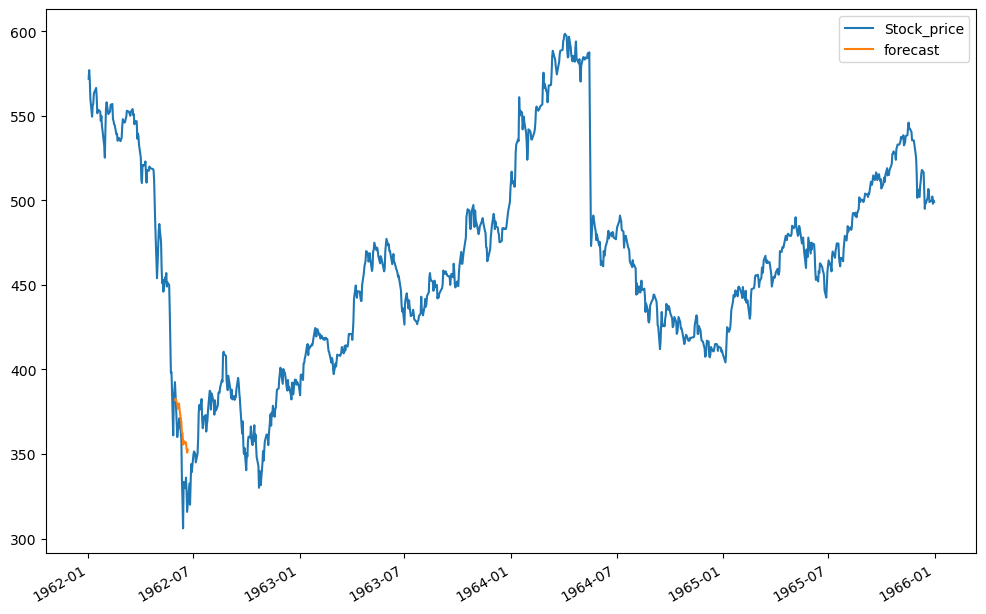

In [382]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Stock_price', 'forecast']].plot(figsize=(12, 8))
plt.show()